# <b>Regression Project with different Modelling techniques</b>

## <b>Introduction:</b>
<p> This project is for a second hand car selling company which is selling Toyota Corolla  extensively. The company wants to predict the price of same cars left in the stock based on the past data of prices that have been sold to the customers. This prediction will help the company in predicting the price of this car model even before customer starts negotiating and sell it for a resonable selling price.</p> 

## <b>Data description</b>
<p>The company wants us to use the data based on the following variables and and neglect th remaining ones.</p>
<li>Age : Provides the age of the car from manufacturing date.</li>
<li>KM : Total kilometres covered by vehicle.</li>
<li>HP : Horse power of the car.</li>
<li>cc : Engine displacement measured in cubic capacity.</li>
<li>Doors : No. of doors the particular model has as it comes in different variants.</li>
<li>Gears : n speed Gearbox(n referring to no. of gears).</li>
<li>Quarterly_tax : Amount paid as tax in dollars.</li>
<li>Weight : Weight of the car.</li>
<li>Fuel_type : Type of fuel used in the car.</li>
<li>Price : Total price of the car (this is our target variable.</li>

## <b>Methodology</b>
<li>Importing basic libraries and loading dataset.</li>
<li>Exploratory Data Analysis</li>
<li>Determining Normality</li>
<li>Train Test split</li>
<li>Linear Regression Model</li>
<li>Linear Regression Model with Polynomial Features</li>
<li>Regularization Techniques with polynomial features</li>
<li>Result</li>

#### <b> Importing basic libraries and loading dataset.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#getting dataset from online link
filename = "https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv"

In [5]:
#we can give column names and feed in headers and place it along filename while reading csv if there are no column names given
#headers = ["model","price","age","mfg_month","mfg_year","km","fuel_type","hp","met_color","color","automatic","cc","doors","cylinders","gears","quarterly_tax","weight","mfr_guarantee","bovag_guarantee","guarantee_period","abs","airbag_1","airbag_2","airco","automatic_airco","boardcomputer","cd_player","central_lock","powered_windows","power_steering","radio","mistlamps","sport_model","backseat_divider","metallic_rim","radio_cassette","parking_assistant","tow_bar"]

In [8]:
#reading file into pandas dataframe
df_co = pd.read_csv(filename)
df_co.head(10)

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight,mfr_guarantee,bovag_guarantee,guarantee_period,abs,airbag_1,airbag_2,airco,automatic_airco,boardcomputer,cd_player,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,White,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
6,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0
7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,Grey,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0
8,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,Red,0,1800,3,4,5,100,1185,0,1,3,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0
9,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,Blue,0,1900,3,4,5,185,1105,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [9]:
#selecting required columns
df_co = df_co[['price','age_08_04','km','fuel_type','hp','cc','doors','gears','quarterly_tax','weight']]

In [13]:
#replacing column name to age for convenience
df_co.rename(columns={"age_08_04":"age"},inplace=True)

In [15]:
#checking for missing or null values
missing_data = df_co.isnull()
missing_data.head(5)

,price,age,km,fuel_type,hp,cc,doors,gears,quarterly_tax,weight
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [16]:
#counting missing values if any
for column in missing_data.columns.values.tolist():
  print(column)
  print (missing_data[column].value_counts())
  print("")

price
False    1436
Name: price, dtype: int64

age
False    1436
Name: age, dtype: int64

km
False    1436
Name: km, dtype: int64

fuel_type
False    1436
Name: fuel_type, dtype: int64

hp
False    1436
Name: hp, dtype: int64

cc
False    1436
Name: cc, dtype: int64

doors
False    1436
Name: doors, dtype: int64

gears
False    1436
Name: gears, dtype: int64

quarterly_tax
False    1436
Name: quarterly_tax, dtype: int64

weight
False    1436
Name: weight, dtype: int64



We do not have any missing values 

In [17]:
df_co.shape

(1436, 10)

In [18]:
df_co.dtypes

price             int64
age               int64
km                int64
fuel_type        object
hp                int64
cc                int64
doors             int64
gears             int64
quarterly_tax     int64
weight            int64
dtype: object

In [19]:
df_co["fuel_type"].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: fuel_type, dtype: int64

In [20]:
df_co["doors"].value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [21]:
df_co["gears"].value_counts()

5    1390
6      43
3       2
4       1
Name: gears, dtype: int64

As we can observe fuel type column has strings which are actually categories so we will use one-hot-encoding because it is a non ordial category.

In [ ]:
df = pd.concat([df_co,pd.get_dummies(df_co['fuel_type'])], axis=1)

In [25]:
df = df.drop(['fuel_type'], axis=1)
df.head()

,price,age,km,hp,cc,doors,gears,quarterly_tax,weight,CNG,Diesel,Petrol
0,13500,23,46986,90,2000,3,5,210,1165,0,1,0
1,13750,23,72937,90,2000,3,5,210,1165,0,1,0
2,13950,24,41711,90,2000,3,5,210,1165,0,1,0
3,14950,26,48000,90,2000,3,5,210,1165,0,1,0
4,13750,30,38500,90,2000,3,5,210,1170,0,1,0


In [27]:
print("Diesel:",df["Diesel"].value_counts())
print("Petrol:",df["Petrol"].value_counts())
print("CNG:",df["CNG"].value_counts())

Diesel: 0    1281
1     155
Name: Diesel, dtype: int64
Petrol: 1    1264
0     172
Name: Petrol, dtype: int64
CNG: 0    1419
1      17
Name: CNG, dtype: int64


####<b>Exploratory Data Analysis</b>

In [29]:
df.shape

(1436, 12)

Lets describe the model

In [28]:
df.describe()

,price,age,km,hp,cc,doors,gears,quarterly_tax,weight,CNG,Diesel,Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,0.011838,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,0.108196,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,1.000000,1.000000,1.000000


Lets check the correlation

In [32]:
df.corr()

,price,age,km,hp,cc,doors,gears,quarterly_tax,weight,CNG,Diesel,Petrol
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,-0.039536,0.054084,-0.038516
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,0.002389,-0.097740,0.092611
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,0.144016,0.403060,-0.433160
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.062109,-0.533453,0.489110
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.005941,0.327723,-0.315170
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.009680,0.025495,-0.027589
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,-0.049537,-0.048847,0.063182
quarterly_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.233791,0.792726,-0.835452
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.052756,0.568087,-0.560470
CNG,-0.039536,0.002389,0.144016,0.062109,0.005941,0.009680,-0.049537,0.233791,0.052756,1.000000,-0.038074,-0.296717


Lets do the same with heat map

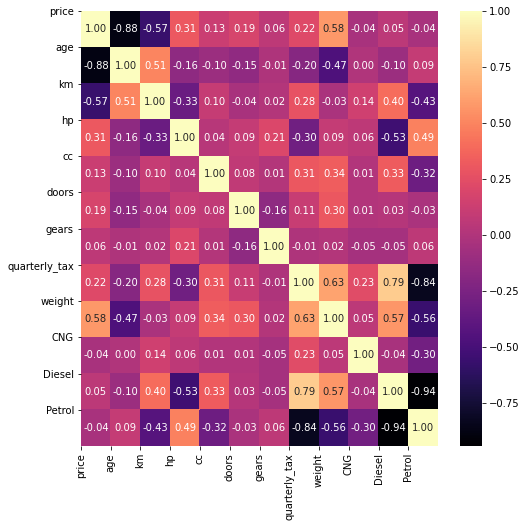

In [35]:
import seaborn as sns
# Check Correlation amoung parameters
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Checking for skewness

In [36]:
#Finding skewness
#-0.5 to 0.5:fairly symmetrical
#(-1 to 0.5) & (0.5 to 1):moderately skewed
#less than -1 or greater than 1:data are highly skewed
#Here all are fairly symmetrical
df.skew()

price             1.703885
age              -0.826702
km                1.015912
hp                0.955836
cc               27.431793
doors            -0.076395
gears             2.283960
quarterly_tax     1.993834
weight            3.108639
CNG               9.036211
Diesel            2.529601
Petrol           -2.344439
dtype: float64

In [37]:
#Finding Kurtosis
#3:mesokurtic (std tail and zero excess distribution)
#<3:platykurtic (thin tail negative excess distribution)
#>3:leptokurtic (fat tailed and positive excess distribution)
df.kurt()

price              3.737781
age               -0.076632
km                 1.685057
hp                 8.836434
cc               930.711227
doors             -1.874765
gears             37.703476
quarterly_tax      4.298345
weight            19.362901
CNG               79.764204
Diesel             4.405014
Petrol             3.501268
dtype: float64

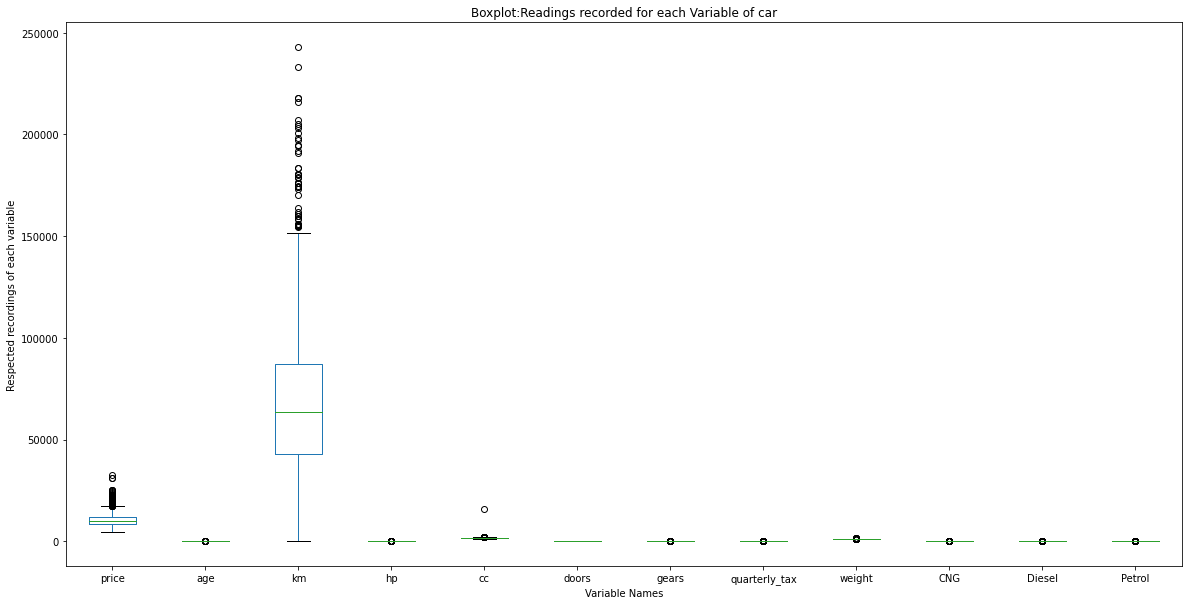

In [38]:
df.plot(kind='box',
        stacked=False,
        figsize=(20, 10), # pass a tuple (x, y) size
        )
plt.xlabel('Variable Names')
plt.ylabel('Respected recordings of each variable')
plt.title('Boxplot:Readings recorded for each Variable of car')
plt.show()

Well obviously there are outliers in km column as different car has different total travelling distance, Other column are pretty even.

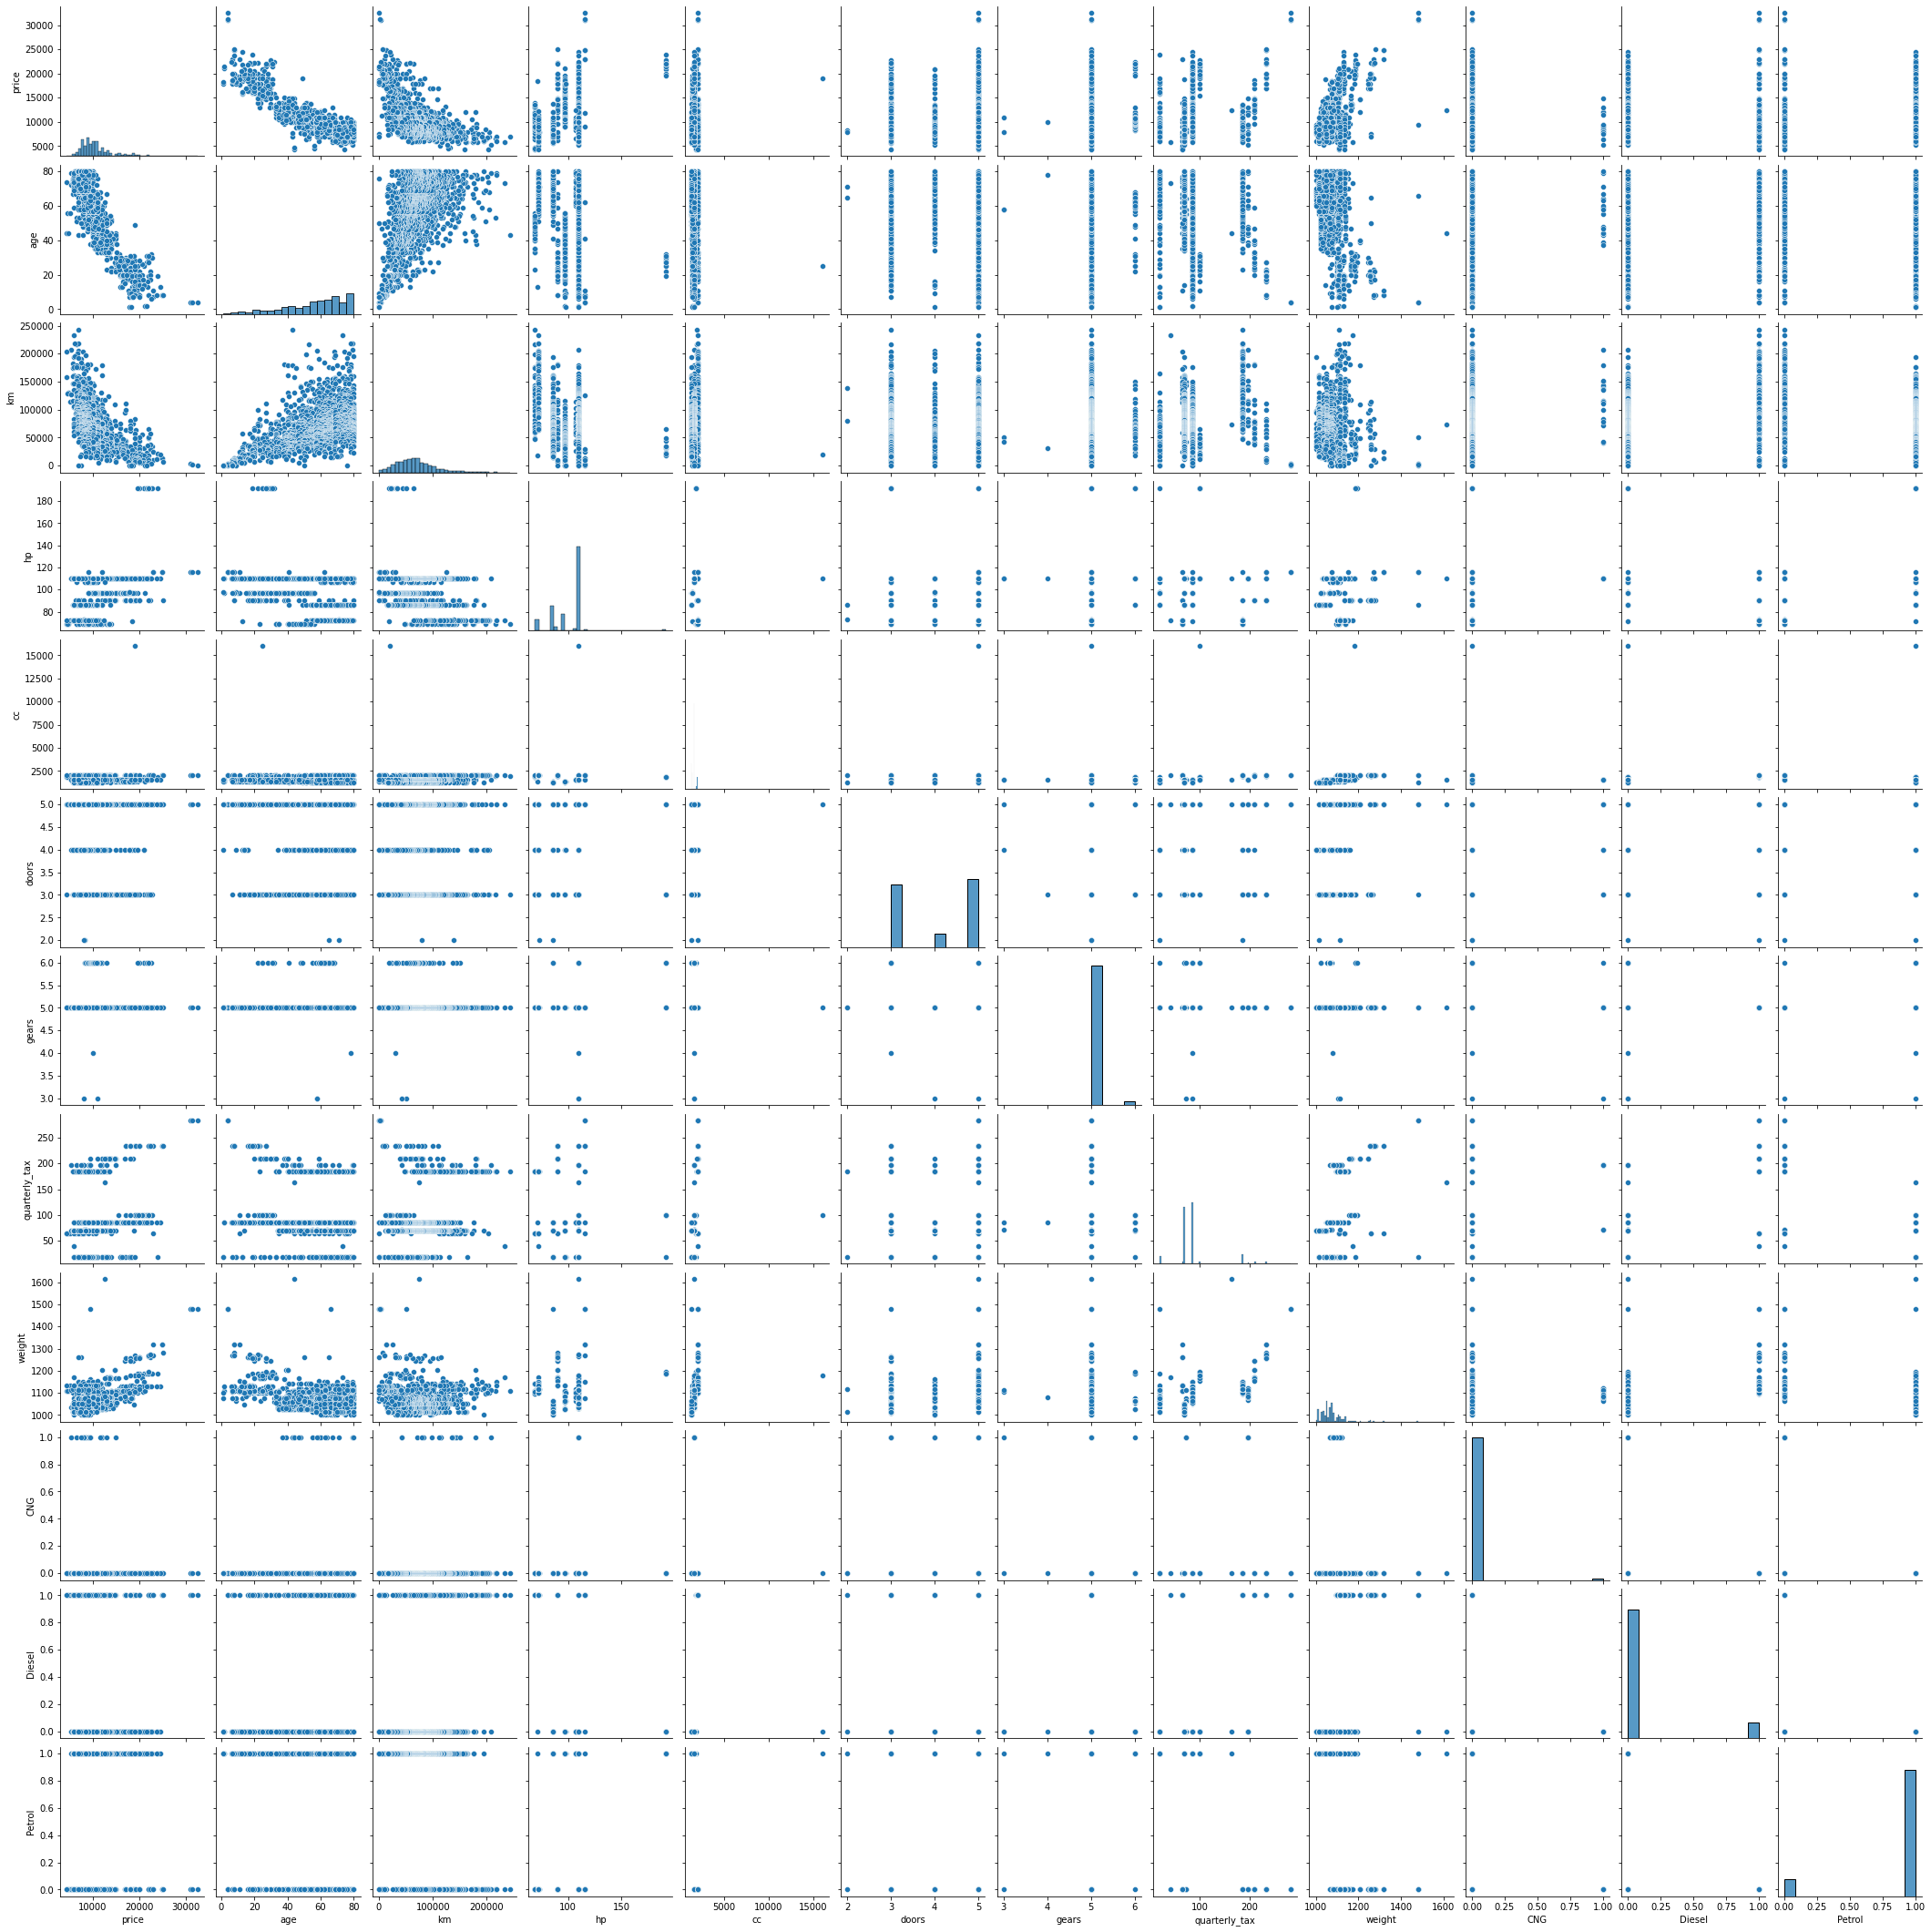

In [39]:
sns.pairplot(df)

####<b>Determining Normality</b>
<p>Making our target variable normally distributed often will lead to better results
If our target is not normally distributed, we can apply a transformation to it and then fit our
regression to predict the transformed values.</p>
<p>How can we tell if our target is normally distributed? There are two ways:</p>
<li>Visually</li>
<li>Using a statistical test</li>

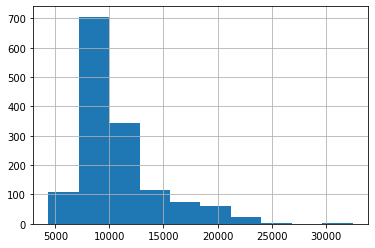

In [40]:
#Visually plotting histogram
df.price.hist()

Definitely doesn't look normal due to long tail on the right side. And also from above skewness and kurtosis we can say that price is higly skewed and has excess distribution.

<p>Lets test statistically</p>
<li>This test outputs a "p-value". The higher this p-value is the closer the distribution is to
normal.</li>
<li>Frequentist statisticians would say that you accept that the distribution is normal (morespecifically: fail to reject the null hypothesis that it is normal) if p > 0.05.</li>


In [41]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df.price.values)

NormaltestResult(statistic=485.1383459517182, pvalue=4.503464013882672e-106)

p-value is extremely low lets try some transformations
<li>Log </li>
<li>squre root</li>
<li>Box Cox</li>

#####<b>Testing Log</b>

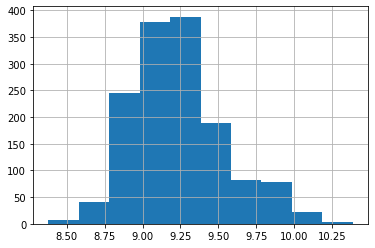

In [42]:
log_df = np.log(df.price)
log_df.hist()

In [44]:
normaltest(log_df.values)

NormaltestResult(statistic=119.70720495594067, pvalue=1.0137029767026255e-26)

improved but not enough

#####<b>Square root test</b>

(array([ 27., 194., 604., 314., 129.,  78.,  61.,  23.,   3.,   3.]),
 array([ 65.95452979,  77.38683319,  88.81913659, 100.25143999,
        111.68374338, 123.11604678, 134.54835018, 145.98065358,
        157.41295698, 168.84526038, 180.27756377]),
 <a list of 10 Patch objects>)

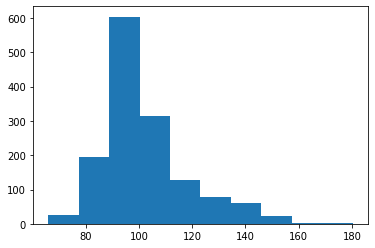

In [45]:
sqrt_df = np.sqrt(df.price)
plt.hist(sqrt_df)

In [46]:
normaltest(sqrt_df.values)

NormaltestResult(statistic=281.7426400205866, pvalue=6.6124600484083065e-62)

This isn't useful for us

#####<b>Boxcox test</b>

In [50]:
from scipy.stats import boxcox
bc_result = boxcox(df.price)
boxcox_df = bc_result[0]
lam = bc_result[1]
lam

-0.7945605201753394

(array([  4.,   3.,  21.,  80., 240., 360., 416., 149., 134.,  29.]),
 array([1.25693976, 1.2570688 , 1.25719783, 1.25732687, 1.2574559 ,
        1.25758493, 1.25771397, 1.257843  , 1.25797203, 1.25810107,
        1.2582301 ]),
 <a list of 10 Patch objects>)

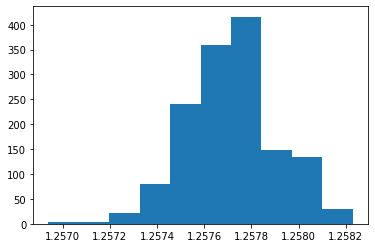

In [51]:
plt.hist(boxcox_df)

In [52]:
normaltest(boxcox_df)

NormaltestResult(statistic=7.929580544963832, pvalue=0.018972015148861304)

Significantly better distributions than other two

####<b>Train Test split</b>

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
Y = df["price"]
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (1436, 11)
Shape of Y: (1436,)


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print('Training set shape:',X_train.shape,Y_train.shape)
print('Testing set shape:', X_test.shape, Y_test.shape)

Training set shape: (1148, 11) (1148,)
Testing set shape: (288, 11) (288,)


Lets scale our input variables training set using standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
print('Scaled set shape:', X_train_s.shape)

Scaled set shape: (1148, 11)


In [63]:
bc_result2 = boxcox(Y_train)
Y_train_bc = bc_result2[0]
lam2 = bc_result2[1]
print('lam2',lam2)
print('Shape of transformed training target variable:', Y_train_bc.shape)

lam2 -0.866260844919934
Shape of transformed training target variable: (1148,)


####<b>Linear Regression Model</b>
<p>Lets apply linear regression model</p>

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_s, Y_train_bc)
X_test_s = ss.transform(X_test)
Y_pred_bc = lr.predict(X_test_s)

We need to apply inverse transform of boxcox on Y_pred_bc

In [65]:
from scipy.special import inv_boxcox
Y_pred_tran = inv_boxcox(Y_pred_bc,lam2)

In [92]:
#converting predicted transformed value to int for convenience in calculating r2_score
Y_pred_trani = Y_pred_tran.astype(int)
Y_pred_trani.dtype

dtype('int64')

Lets predict the r2 score

In [108]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred_tran - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred_tran - Y_test) ** 2))
print("R2-score: %.2f" % (r2_score(Y_test, Y_pred_trani)))

Mean absolute error: 996.32
Residual sum of squares (MSE): 1779609.25
R2-score: 0.76


Now lets check Linear regression without normalization.

In [95]:
lr2 = LinearRegression()
lr2.fit(X_train_s, Y_train)
Y_pred = lr.predict(X_test_s)

In [96]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - Y_test) ** 2))
print("R2-score: %.2f" % (r2_score(Y_test , Y_pred) ))

Mean absolute error: 10748.00
Residual sum of squares (MSE): 127961692.00
R2-score: -9.28


####<b>Linear regression with Polynomial features</b>

In [110]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [113]:
X_pf.shape

(1436, 77)

Train test split of polynamial features set

In [112]:
X_trainpf, X_testpf, Y_trainpf, Y_testpf = train_test_split(X_pf, Y, test_size=0.2,random_state=72018)
print('Shape of pf training set:',X_trainpf.shape,Y_trainpf.shape)
print('Shape of pf testing set:',X_testpf.shape,Y_testpf.shape)

Shape of pf training set: (1148, 77) (1148,)
Shape of pf testing set: (288, 77) (288,)


In [114]:
X_trainpf_s = ss.fit_transform(X_trainpf)

In [116]:
bc_result3 = boxcox(Y_trainpf)
Y_trainpf_bc = bc_result3[0]
lam3 = bc_result3[1]
print('lam3:',lam3)
print('Shape of Y_trainpf_bc:',Y_trainpf_bc.shape)

lam3: -0.790474365141565
Shape of Y_trainpf_bc: (1148,)


In [117]:
lr3 = LinearRegression()
lr3.fit(X_trainpf_s, Y_trainpf_bc)
X_testpf_s = ss.transform(X_testpf)
Y_predpf_bc = lr3.predict(X_testpf_s)

In [118]:
Y_predpf_tran = inv_boxcox(Y_predpf_bc,lam3)
#converting predicted transformed value to int for convenience in calculating r2_score
Y_predpf_trani = Y_predpf_tran.astype(int)
Y_predpf_trani.dtype

dtype('int64')

In [119]:
print("R2-score: %.2f" % (r2_score(Y_testpf , Y_predpf_trani) ))

R2-score: 0.89


<b>NOTE:</b> We can see that our r2 score has improved

####<b>Regularization Techniques</b>
<li>Ridge Regression(L2)</li>
<li>Lasso Regression(L1)</li>

#####<b>Ridge Regression</b>

Lets Use the above polynomial features for regularization techniques.
<p>X_trainpf_s, Y_trainpf_bc, X_testpf_s, Y_test

In [120]:
from sklearn.linear_model import Ridge, Lasso
rr = Ridge(alpha = 0.001)
rr = rr.fit(X_trainpf_s, Y_trainpf_bc)
Y_predrr = rr.predict(X_testpf_s)

In [121]:
Y_predrr_tran = inv_boxcox(Y_predrr,lam3)
#converting predicted transformed value to int for convenience in calculating r2_score
Y_predrr_trani = Y_predrr_tran.astype(int)
Y_predrr_trani.dtype

dtype('int64')

In [122]:
print("R2-score: %.2f" % (r2_score(Y_testpf , Y_predrr_trani) ))

R2-score: 0.89


#####<b>Lasso Regression</b>

In [123]:
lasr = Lasso(alpha = 0.001)
lasr = lasr.fit(X_trainpf_s, Y_trainpf_bc)
Y_predlasr = lasr.predict(X_testpf_s)

In [124]:
Y_predlasr_tran = inv_boxcox(Y_predlasr,lam3)
#converting predicted transformed value to int for convenience in calculating r2_score
Y_predlasr_trani = Y_predlasr_tran.astype(int)
Y_predlasr_trani.dtype

dtype('int64')

In [125]:
print("R2-score: %.2f" % (r2_score(Y_testpf , Y_predlasr_trani) ))

R2-score: -0.04


##<b>Result:</b>

|  Model   | r2 Score |
|----------|----------|
| Linear ss|   0.76   |
| Linear   |  -9.28   |
| Linear pf|   0.89   |
| Ridge pf |   0.89   |
| Lasso pf |  -0.04   |

We can now conclude this project with the help of above result that Linear regression with polynomial features and ridge regression with polynomial features has 89%. Thus we can say Linear regression with polynomial features gives a fair prediction and further can be used predict the prices of Toyota corolla car prices in future.  